# Task 1

### House Price Prediction

#### Objective:
##### Use a dataset that includes information about housing prices and features like square footage, number of bedrooms, etc. to train a model that can predict the price of a new house

### Author: Aurobindo Parida

Lets import some libraries required for the task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lets import and read the dataset.

In [2]:
data = pd.read_csv(r'C:\Users\askap\Downloads\kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Lets drop some inrelevant variables from the dataset.

In [3]:
data = data.drop(['id','yr_renovated','date','zipcode','sqft_living','sqft_lot'],axis=1)
pd.DataFrame(data)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


Lets see the datatype.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   floors         21613 non-null  float64
 4   waterfront     21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


In [5]:
data['bathrooms'] = data['bathrooms'].round().astype('int64')
data['floors'] = data['floors'].round().astype('int64')
pd.DataFrame(data)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2,2,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1,1,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3,1,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2,1,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,3,0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2,2,0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,1,2,0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2,2,0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
x = data.drop(['price'],axis=1)
y = data['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=102)

Lets visualise the data and see the if we can see any co-relation.

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

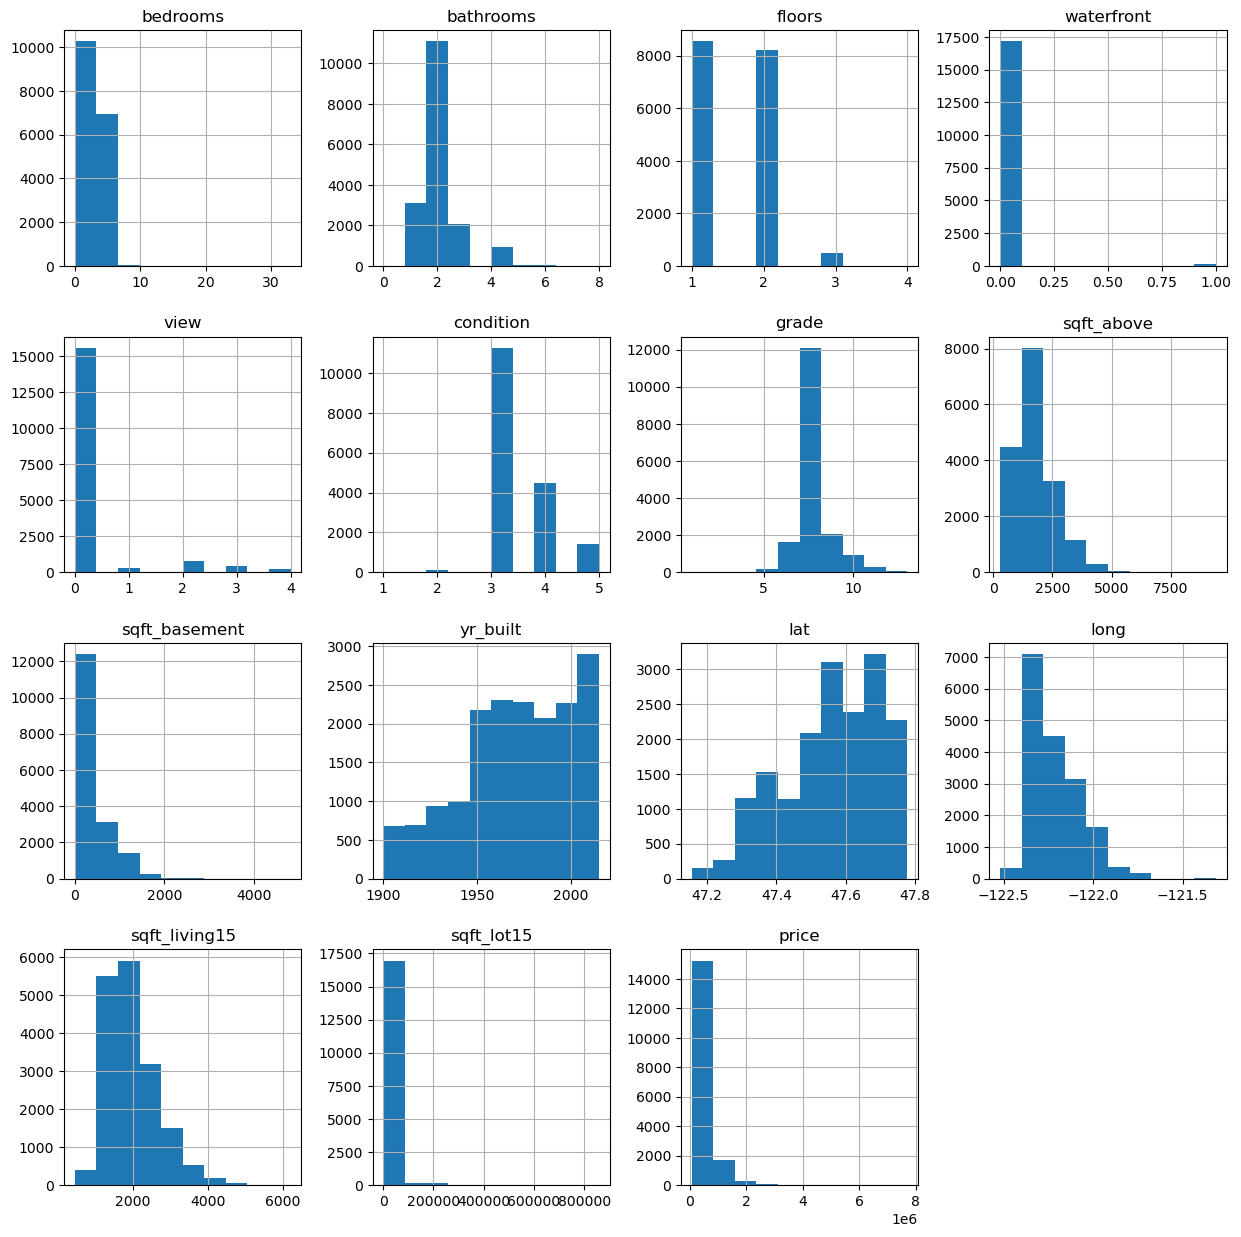

In [8]:
training_data = x_train.join(y_train)
training_data.hist(figsize=(15,15))


### Training the Algorithm
We shall train the algorithm using linear regression

In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

#### Time to make prediction
After training the dataset we shall now predict the data from test set.

In [11]:
y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Predicted'] = df['Predicted'].round().astype('int64')
df

,Actual,Predicted
15783,525000.0,565124
14209,355000.0,489008
13532,600000.0,667662
10846,548500.0,345086
15952,264500.0,196180
...,...,...
11362,862000.0,1084677
1159,315000.0,287392
12939,275000.0,573991
19484,2395000.0,1146562


## Now testing with our own data

In [12]:
import pandas as pd

# Collecting user inputs
bedrooms = int(input("Number of bedrooms: "))
bathrooms = int(input("Number of bathrooms: "))
floors = int(input("Number of floors: "))
waterfront = int(bool(input("Is there a waterfront? (True/False): ")))
view = int(input("Number of views: "))
condition = int(input("Type of condition (0/1/2/3/4/5): "))
grade = int(input("Enter grade: "))
sqft_above = int(input("Enter sqft_above: "))
sqft_basement = int(input("Enter sqft_basement: "))
yr_built = int(input("Year Built: "))
lat = float(input("Enter the latitude: "))
long = float(input("Enter the longitude: "))
sqft_living15 = int(input("Enter sqft_living: "))
sqft_lot15 = int(input("Enter sqft_lot: "))

# Creating a dictionary with user inputs
data = {
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'floors': [floors],
    'waterfront': [waterfront],
    'view': [view],
    'condition': [condition],
    'grade': [grade],
    'sqft_above': [sqft_above],
    'sqft_basement': [sqft_basement],
    'yr_built': [yr_built],
    'lat': [lat],
    'long': [long],
    'sqft_living15': [sqft_living15],
    'sqft_lot15': [sqft_lot15]
}

# Creating a DataFrame
My_House = pd.DataFrame(data)
print(My_House)

own_pred = model.predict(My_House)
print("Predicted Price:", own_pred[0])

Number of bedrooms: 6
Number of bathrooms: 4
Number of floors: 2
Is there a waterfront? (True/False): True
Number of views: 2
Type of condition (0/1/2/3/4/5): 3
Enter grade: 4
Enter sqft_above: 1589
Enter sqft_basement: 456
Year Built: 1986
Enter the latitude: 47.12556
Enter the longitude: -122.2564
Enter sqft_living: 2103
Enter sqft_lot: 2564
   bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0         6          4       2           1     2          3      4   

   sqft_above  sqft_basement  yr_built       lat      long  sqft_living15  \
0        1589            456      1986  47.12556 -122.2564           2103   

   sqft_lot15  
0        2564  
Predicted Price: 572397.0040624887


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 126148.60166300402
